In [ ]:

from retriever import Retriever
from query_grader import Grader
from qa_rag import RAG
from tools import Tools
from graphstate import Graph
%load_ext autoreload
%autoreload 2

similarity_threshold_retriver = Retriever().create_retriever()
doc_grader = Grader().create_grader()
question_rewriter = RAG().rephraser()
web_tool = Tools().tavily_search_tool()
wiki_tool = Tools().wiki_search_tool()
arxiv_tool = Tools().arxiv_search_tool()
qa_rag_chain = RAG().create_rag_chain()

graph = Graph(similarity_threshold_retriever=similarity_threshold_retriver,
              doc_grader=doc_grader,
              question_rewriter=question_rewriter,
              web_search_tool=web_tool,
              qa_rag_chain=qa_rag_chain).build_graph()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


INFO:retriever:Loaded 1 documents.
INFO:retriever:Split documents into 73 chunks.
INFO:retriever:FAISS index already exists. Loading existing index...
INFO:retriever:Loaded existing FAISS index!
INFO:retriever:Retriever created successfully
INFO:query_grader:Created a query grader successfully.
INFO:qa_rag:created a rephraser chain
INFO:tools:Created a tavily web search tool successfully.
INFO:qa_rag:created a prompt template for qa rag
INFO:qa_rag:created a qa rag chain


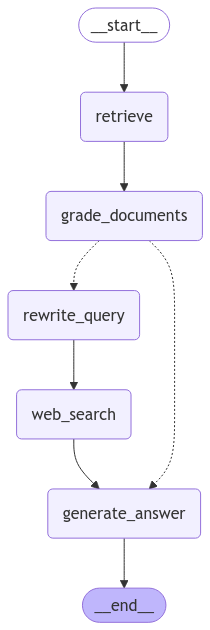

In [115]:
graph

In [121]:
query= "what is hip arthoplasty?"
response = graph.invoke({'question':query})


INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:graphstate:Document is relevant
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:graphstate:Document is relevant
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:graphstate:Document is irrelevant
INFO:graphstate:Some or all documents are irrelevant
INFO:graphstate:Rephrasing the query
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:graphstate:Rephrased query: What is the surgical procedure known as hip arthoplasty? 
 
INFO:graphstate:Performing web search
INFO:graphstate:Generating Answer
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


In [122]:
from IPython.display import Markdown, display
display(Markdown(response['generation']))

Hip arthoplasty is a surgical procedure to address hip pain.  

The surgery replaces parts of the hip joint with artificial implants.  

The hip joint consists of a ball (at the top of the femur, also known as the thigh bone) and a socket (in the pelvis, also known as the hip bone). 


In [74]:
qa_rag_chain.invoke(
    {"context":docs,'question':query}
)


INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


'The provided text focuses on hip replacement surgery and does not offer a definition of a hip injury. \n\nI cannot answer your question based on the given context. \n'

In [86]:
query = "who won chanpions league in 2024"
question_rewriter.invoke({'question': query})

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


'Who won the UEFA Champions League in 2024? \n'

In [94]:
docs = web_tool.invoke({'query': query})
docs

INFO:primp:response: https://duckduckgo.com/?q=who+won+chanpions+league+in+2024 200 19004
INFO:primp:response: https://links.duckduckgo.com/d.js?q=who+won+chanpions+league+in+2024&kl=wt-wt&l=wt-wt&p=&s=0&df=y&vqd=4-238515561572872904857831823674767543175&bing_market=wt-WT&ex=-1 200 12420


"snippet: Real Madrid toiled for the first hour of the 2024 UEFA Champions League final against Borussia Dortmund before goals from Dani Carvajal and Vinicius Junior sealed victory., title: Who won Champions League final 2024? How Carvajal, Vinicius Jr. sealed ..., link: https://www.sportingnews.com/us/soccer/news/who-won-champions-league-final-2024-real-madrid-borussia-dortmund/c2aa2d0b8666ccb0125474be, snippet: Real Madrid toiled for the first hour of the 2024 UEFA Champions League final against Borussia Dortmund before goals from Dani Carvajal and Vinicius Junior sealed victory., title: Who won Champions League final 2024? How Carvajal ... - Sporting News, link: https://www.sportingnews.com/uk/football/news/who-won-champions-league-final-2024-real-madrid-borussia-dortmund/c2aa2d0b8666ccb0125474be, snippet: Dani Carvajal and Vinícius Júnior scored the goals as Real Madrid overcame a spirited Borussia Dortmund 2-0 to win the 2024 UEFA Champions League final at Wembley Stadium. Key mom